# VISIONS-2 Make scatter plots of wave power in various bands vs upflowing ions. 

### Load basic VISIONS-2 data

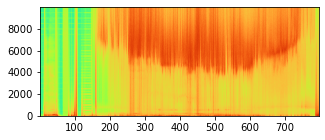

In [2]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import visions2_load_data
import v2  #plotting functions
import numpy as np 
import matplotlib.pyplot as plt

#%load_ext nb_black
plt.rcParams['figure.figsize'] = [5, 2]


"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2

"""Load Langmuir Probe data"""
lp = visions2_load_data.load_langmuir()

"""Load magnetometer data"""
mag = visions2_load_data.load_mag()


"""Load E-field DC data (low-flyer only)"""
edc = visions2_load_data.load_efieldDC()

"""Load particle data"""
#All particle data
#elec = visions2_load_data.load_particle("eea")
#ions = visions2_load_data.load_particle("eia")

#Sum over pitch angles
#elecPerp = visions2_load_data.load_particle("eea",range=[70,110],sumtype=1)
#ionsPerp = visions2_load_data.load_particle("eia",range=[70,110],sumtype=1)
elecDowngoing = visions2_load_data.load_particle("eea",range=[0,40],sumtype=1,FoldPitchangles=1)
#ionsDowngoing = visions2_load_data.load_particle("eia",range=[-20,20],sumtype=1)
#elecUpgoing = visions2_load_data.load_particle("eea",range=[147,180],sumtype=1)
ionsUpgoing = visions2_load_data.load_particle("eia",range=[135,180],sumtype=1,FoldPitchangles=1)
ionsDowngoing = visions2_load_data.load_particle("eia",range=[0,40],sumtype=1,FoldPitchangles=1)
#Sum over energies
#elecLowE = visions2_load_data.load_particle("eea",range=[0,100],sumtype=2)
#ionsLowE = visions2_load_data.load_particle("eia",range=[0,10],sumtype=2)
#elecHigE = visions2_load_data.load_particle("eea",range=[200,200000],sumtype=2)
#ionsHigE = visions2_load_data.load_particle("eia",range=[1000,30000],sumtype=2)




"""Load VLF data"""
vlfdata = visions2_load_data.load_vlf()
vlf12_lf = vlfdata["vlf12_lf"]
dvlf12_lf = vlf12_lf["dvlf12"]
times_vlf_lf = vlf12_lf["tvlf12"]

#sampling freq
sr_lf = [1/(times_vlf_lf[i+1]-times_vlf_lf[i]) for i in range(times_vlf_lf.size-1)]
fsVLF_lf = np.mean(sr_lf)
fsVLF = fsVLF_lf

"""Get spectral data - I only know how to do this by plotting, which is awkward"""
fig, axs = plt.subplots(1)
Sxx, specfreqs, spectimes, im = axs.specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo')
fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])


### Get lower hybrid and other important frequencies

In [3]:

import plasma_params_get_flhr_freq

#Interpolate Langmuir probe density values to the time cadence of mag data. 
ne = np.interp(mag["times"], lp["lowflyer"]["times"], lp["lowflyer"]["ne"])

nH_ne = [0.] * np.size(mag["times"]) #fraction of H+
nO_ne = [1.] * np.size(mag["times"]) #fraction of O+
#print(np.type(np.size(mag["times"])))

#ne = 7e4  #rough value from Hassan's Langmuir probe results.
#1e4 gives a much better flhr when compared to the VLF data...Not sure what's going on here. 


#First test applicability of high density limit. 
#flhr_test = visions2_get_flhr.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])
flhr_test = plasma_params_get_flhr_freq.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])

#flhr in high density limit for pure H+ and O+ plasmas
flhr_highdens_H = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcH"])  #100% H+
flhr_highdens_O = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcO"])  #100% O+

#flhr w/o high density assumption
flhr_MassFrac = plasma_params_get_flhr_freq.flhr_IonMassFractions(ne, mag["fce"], nH_ne, nO_ne)


#Lower hybrid frequency (not in high density limit) for full H+ and full O+
flhr_H = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcH"])
flhr_O = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcO"])


flh_interp = np.interp(spectimes, mag["times"], flhr_MassFrac)



/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:33: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(fce))]
/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:56: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(ne))]
/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:70: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(ne))] #Hz


### Plot VLF waves and ions [Overview]

/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/v2.py:17: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='auto',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])
/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/v2.py:17: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='auto',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


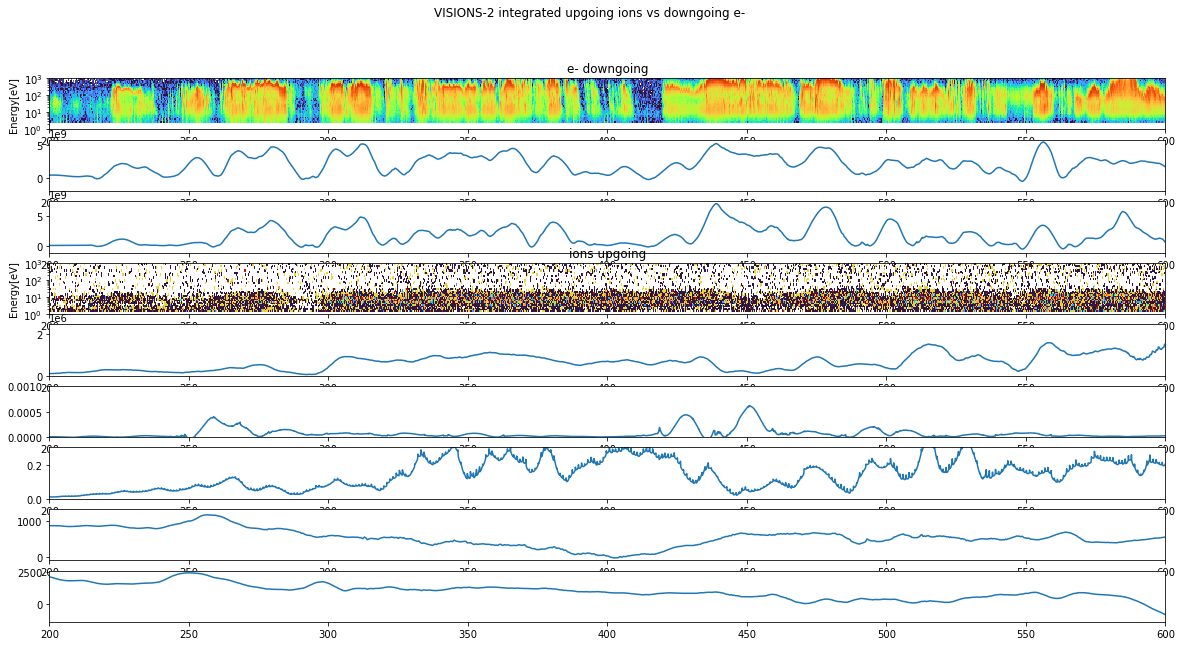

In [12]:

import scipy.signal 
import math

plt.rcParams['figure.figsize'] = [20, 10]

#Upgoing ions from 135-180 deg PA and 0-20 eV 
#Downgoing e- (Alfvenic) from 10-100 eV 
#Downgoing e- (inverted-V) > 400 eV 


smootime = 20. #smooth time in sec

#Standard time base
t = ionsUpgoing["times"]



#vlfAmp_smoothed = v2.IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 3000, 10000, smootime)
eAmpDowngoing_Alfvenic_int = v2.IntegrateSpectra(elecDowngoing["flux"],elecDowngoing["times"],elecDowngoing["energies"],10,20,smootime)
eAmpDowngoing_InvertedV_int = v2.IntegrateSpectra(elecDowngoing["flux"],elecDowngoing["times"],elecDowngoing["energies"],200,8000,smootime)
iAmpUpgoing_int = v2.IntegrateSpectra(ionsUpgoing["flux"],ionsUpgoing["times"],ionsUpgoing["energies"],0,100,smootime)
iAmpDowngoing_int = v2.IntegrateSpectra(ionsDowngoing["flux"],ionsDowngoing["times"],ionsDowngoing["energies"],10,20000,smootime)




fcH = np.interp(spectimes, mag["times"], mag["fcH"])
fcO = np.interp(spectimes, mag["times"], mag["fcO"])
Vzonal = np.interp(t, edc["times"], edc["Vzonal"])
Vmerid = np.interp(t, edc["times"], edc["Vmerid"])

sr = 1/(np.median(t - np.roll(t,1)))
npts = math.floor(sr * smootime)
#require npts to be an odd number
if npts % 2 == 0:
    npts = npts + 1

Vzonal_smoo = scipy.signal.savgol_filter(Vzonal, npts, 5)
Vmerid_smoo = scipy.signal.savgol_filter(Vmerid, npts, 5)
Vtots_smoo = np.sqrt(Vzonal_smoo**2 + Vmerid_smoo**2)


vlfAmp_fcH_int = v2.IntegrateSpectra_Dynamic(np.transpose(Sxx), spectimes, specfreqs, fcH, 20, smootime)
vlfAmp_fcO_int = v2.IntegrateSpectra_Dynamic(np.transpose(Sxx), spectimes, specfreqs, fcO, 20, smootime)

vlfAmp_10_40_int = v2.IntegrateSpectra(np.transpose(Sxx),spectimes,specfreqs,10,40,smootime)
vlfAmp_150_300_int = v2.IntegrateSpectra(np.transpose(Sxx),spectimes,specfreqs,150,300,smootime)
vlfAmp_500_700_int = v2.IntegrateSpectra(np.transpose(Sxx),spectimes,specfreqs,500,700,smootime)
vlfAmp_4000_10000_int = v2.IntegrateSpectra(np.transpose(Sxx),spectimes,specfreqs,400,10000,smootime)






fig, axs = plt.subplots(9)
fig.suptitle('VISIONS-2 integrated upgoing ions vs downgoing e-')
kwargs = {"vmin":-50, "vmax":-10}

p=0
PlotParams = {"title":"e- downgoing", "yscale":"log", "ylim":[1,1000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":7,"vmax":11,"colorbar":0}
v2.PlotParticle(elecDowngoing["times"],elecDowngoing["energies"],elecDowngoing["flux"],p,axs,**PlotParams)
p=p+1
axs[p].plot(elecDowngoing["times"],eAmpDowngoing_Alfvenic_int)
p=p+1
axs[p].plot(elecDowngoing["times"],eAmpDowngoing_InvertedV_int)

p=p+1
PlotParams = {"title":"ions upgoing", "yscale":"log", "ylim":[1,1000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsUpgoing["times"],ionsUpgoing["energies"],ionsUpgoing["flux"],p,axs,**PlotParams)
p=p+1
axs[p].plot(ionsUpgoing["times"],iAmpUpgoing_int)
axs[p].set_ylim(0,3*np.median(iAmpUpgoing_int))
p=p+1
axs[p].plot(spectimes, vlfAmp_fcH_int)
axs[p].set_ylim(0,0.001)
p=p+1
axs[p].plot(spectimes, vlfAmp_fcO_int)
axs[p].set_ylim(0,0.3)
p=p+1
axs[p].plot(t, Vmerid_smoo)
p=p+1
axs[p].plot(t, Vzonal_smoo)


tmin = 200
tmax = 600
#for i in axs: i.set_xlim(tmin,tmax)
for i in axs: i.set_xlim(tmin,tmax)

(1, 8000)


Text(0, 0.5, 'Upgoing ion flux 0-100 eV')

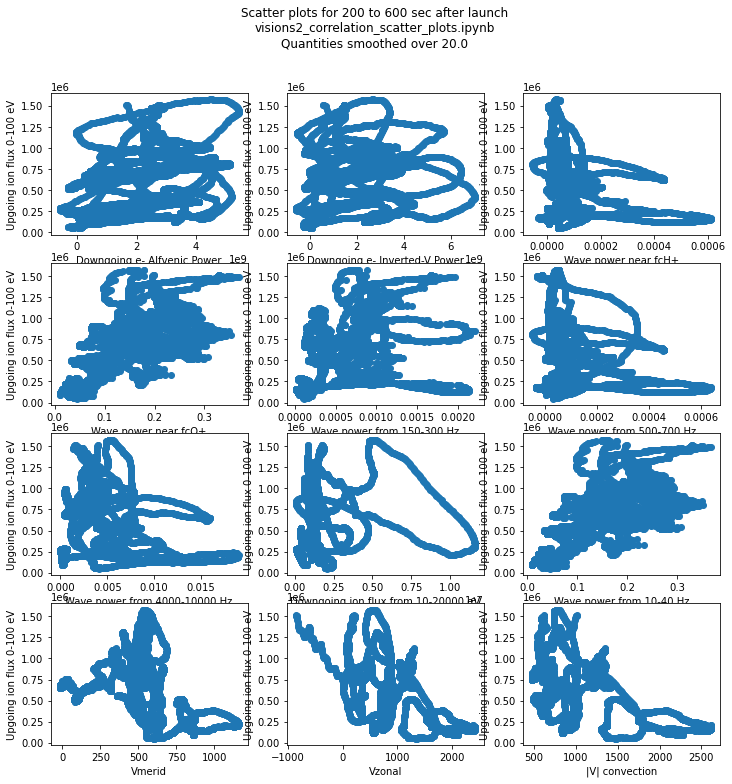

In [13]:
plt.rcParams['figure.figsize'] = [12, 12]

import cdflib 

fig, axs = plt.subplots(4,3)


#eAmpDowngoing_Alfvenic_int2 = np.interp(elecDowngoing["times"],t,eAmpDowngoing_Alfvenic_int)
#eAmpDowngoing_InvertedV_int2 = np.interp(elecDowngoing["times"],t,eAmpDowngoing_InvertedV_int)
eAmpDowngoing_Alfvenic_int2 = np.interp(t, elecDowngoing["times"],eAmpDowngoing_Alfvenic_int)
eAmpDowngoing_InvertedV_int2 = np.interp(t, elecDowngoing["times"],eAmpDowngoing_InvertedV_int)
eAmpDowngoing_InvertedV_int2 = np.interp(t, elecDowngoing["times"],eAmpDowngoing_InvertedV_int)


vlfAmp_fcH_int2 = np.interp(t, spectimes, vlfAmp_fcH_int)
vlfAmp_fcO_int2 = np.interp(t, spectimes, vlfAmp_fcO_int)
vlfAmp_10_40_int2 = np.interp(t, spectimes, vlfAmp_10_40_int)
vlfAmp_150_300_int2 = np.interp(t, spectimes, vlfAmp_150_300_int)
vlfAmp_500_700_int2 = np.interp(t, spectimes, vlfAmp_500_700_int)
vlfAmp_4000_10000_int2 = np.interp(t, spectimes, vlfAmp_4000_10000_int)


#Clip data to start and stop times
#goot = np.where((t >= 200) & (t <= 600))
goot = np.where((t >= tmin) & (t <= tmax))
print(np.shape(goot))

fig.suptitle("Scatter plots for "+ str(tmin) + " to " + str(tmax) + " sec after launch\nvisions2_correlation_scatter_plots.ipynb\nQuantities smoothed over " + str(smootime))

axs[0,0].scatter(eAmpDowngoing_Alfvenic_int2[goot],iAmpUpgoing_int[goot])
axs[0,0].set_xlabel("Downgoing e- Alfvenic Power")
axs[0,0].set_ylabel("Upgoing ion flux 0-100 eV")

axs[0,1].scatter(eAmpDowngoing_InvertedV_int2[goot],iAmpUpgoing_int[goot])
axs[0,1].set_xlabel("Downgoing e- Inverted-V Power")
axs[0,1].set_ylabel("Upgoing ion flux 0-100 eV")

axs[0,2].scatter(vlfAmp_fcH_int2[goot],iAmpUpgoing_int[goot])
axs[0,2].set_xlabel("Wave power near fcH+")
axs[0,2].set_ylabel("Upgoing ion flux 0-100 eV")

axs[1,0].scatter(vlfAmp_fcO_int2[goot],iAmpUpgoing_int[goot])
axs[1,0].set_xlabel("Wave power near fcO+")
axs[1,0].set_ylabel("Upgoing ion flux 0-100 eV")


axs[1,1].scatter(vlfAmp_150_300_int2[goot],iAmpUpgoing_int[goot])
axs[1,1].set_xlabel("Wave power from 150-300 Hz")
axs[1,1].set_ylabel("Upgoing ion flux 0-100 eV")

axs[1,2].scatter(vlfAmp_500_700_int2[goot],iAmpUpgoing_int[goot])
axs[1,2].set_xlabel("Wave power from 500-700 Hz")
axs[1,2].set_ylabel("Upgoing ion flux 0-100 eV")

axs[2,0].scatter(vlfAmp_4000_10000_int2[goot],iAmpUpgoing_int[goot])
axs[2,0].set_xlabel("Wave power from 4000-10000 Hz")
axs[2,0].set_ylabel("Upgoing ion flux 0-100 eV")

axs[2,1].scatter(iAmpDowngoing_int[goot],iAmpUpgoing_int[goot])
axs[2,1].set_xlabel("Downgoing ion flux from 10-20000 eV")
axs[2,1].set_ylabel("Upgoing ion flux 0-100 eV")

axs[2,2].scatter(vlfAmp_10_40_int2[goot],iAmpUpgoing_int[goot])
axs[2,2].set_xlabel("Wave power from 10-40 Hz")
axs[2,2].set_ylabel("Upgoing ion flux 0-100 eV")

axs[3,0].scatter(Vmerid_smoo[goot],iAmpUpgoing_int[goot])
axs[3,0].set_xlabel("Vmerid")
axs[3,0].set_ylabel("Upgoing ion flux 0-100 eV")

axs[3,1].scatter(Vzonal_smoo[goot],iAmpUpgoing_int[goot])
axs[3,1].set_xlabel("Vzonal")
axs[3,1].set_ylabel("Upgoing ion flux 0-100 eV")

axs[3,2].scatter(Vtots_smoo[goot],iAmpUpgoing_int[goot])
axs[3,2].set_xlabel("|V| convection")
axs[3,2].set_ylabel("Upgoing ion flux 0-100 eV")







In [13]:
import cdflib 
import numpy as np 

fn = '/Users/abrenema/Downloads/rbspa_efw-l3_20150104_v01.cdf'
cdf_file = cdflib.CDF(fn)

print(cdf_file.cdf_info())
print(cdf_file.varinq('flags_all'))

data = cdf_file.varget("flags_all")
np.shape(data)


{'CDF': PosixPath('/Users/abrenema/Downloads/rbspa_efw-l3_20150104_v01.cdf'), 'Version': '3.4.1', 'Encoding': 1, 'Majority': 'Row_major', 'rVariables': [], 'zVariables': ['epoch', 'density', 'flags_all', 'efw_qual_labl', 'charging_flag_labl', 'eclipse_flag_labl', 'EFW_QUAL_NR', 'bias_flag_labl', 'mgse_vel_labl', 'efw_qual_compno', 'EFW_QUAL_GOOD', 'EFW_QUAL_UNK', 'pos_gse', 'vsvy_maxval', 'vel_gse', 'efield_inertial_frame_mgse', 'efield_corotation_frame_mgse', 'vsvy_labl', 'VcoroxB_mgse', 'VscxB_mgse', 'esvy_labl', 'sfit_labl2', 'sfit_labl', 'vxb_labl', 'bfield_labl', 'bfield_minus_model_labl', 'gse_vel_labl', 'sfit_labl3', 'spinaxis_gse', 'spinaxis_labl', 'coro_labl', 'Vavg', 'mlt_lshell_mlat', 'location_labl', 'flags_charging_bias_eclipse', 'Bfield_LABL_1', 'density_potential_LABL_1', 'ephemeris_LABL_1', 'angle_Ey_Ez_Bo_LABL_1', 'flag_labl', 'gse_pos_labl', 'bias_current_LABL_1'], 'Attributes': [{'Project': 'Global'}, {'Source_name': 'Global'}, {'Discipline': 'Global'}, {'Descriptor'